<a href="https://colab.research.google.com/github/nikishkaaa/Intelligent_data_analysis-UNI/blob/main/IAD3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install opendatasets --upgrade --quiet

In [60]:
import numpy as np
import pandas as pd
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt
import opendatasets as od
import os
import graphviz
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTENC
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree

In [5]:
dataset_url = 'https://www.kaggle.com/datasets/prathamtripathi/drug-classification'
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: darianikishkina
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/prathamtripathi/drug-classification


100%|██████████| 1.68k/1.68k [00:00<00:00, 2.66MB/s]

In [7]:
os.listdir()

['.config', 'drug-classification', 'sample_data']

In [19]:
df = pd.read_csv('./drug-classification/drug200.csv')
df.head(5)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [30]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


<Axes: xlabel='Drug', ylabel='count'>

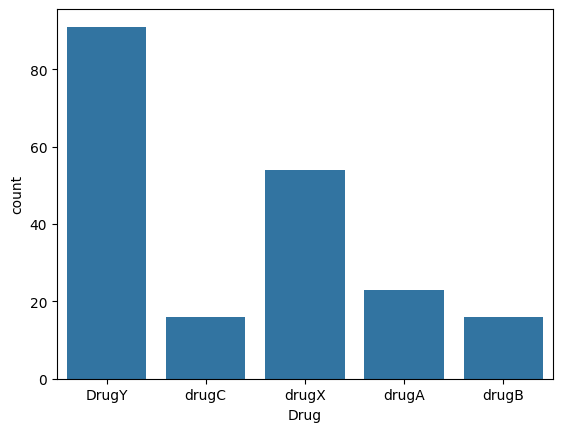

In [23]:
sns.countplot(x= 'Drug', data= df)

In [89]:
X = df.drop('Drug', axis=1)
y = df['Drug']

In [90]:
cat_columns = X.select_dtypes(include='object').columns.tolist()
num_columns = X.select_dtypes(exclude='object').columns.tolist()

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [107]:
numerical_transformer = Pipeline(
    steps=[
        ('scaler', StandardScaler())
    ]
)


categorical_tarnsformer = Pipeline(
    steps=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ]
)


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, num_columns),
        ('cat', categorical_tarnsformer, cat_columns)
    ]
)


In [108]:
cat_feature_indeces = [X_train.columns.get_loc(col) for col in cat_columns]

smotenc = SMOTENC(categorical_features=cat_feature_indeces, random_state=42)
X_train_transformed =preprocessor.fit_transform(X_train)

X_train_smotenc, y_train_smotenc = smotenc.fit_resample(X_train_transformed, y_train)

In [109]:
X_test = preprocessor.transform(X_test)

In [115]:
X_train_smotenc

array([[ 1.10245507,  1.57331689,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.54640068, -0.26086288,  0.        , ...,  1.        ,
         1.        ,  0.        ],
       [ 1.28780654, -0.31202314,  1.        , ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.20783114, -0.88265685,  1.        , ...,  1.        ,
         0.        ,  1.        ],
       [ 1.00063346, -1.22335047,  0.        , ...,  1.        ,
         0.        ,  1.        ],
       [-0.03765982, -1.30796168,  0.        , ...,  1.        ,
         0.        ,  1.        ]])

In [117]:
feature_names = preprocessor.get_feature_names_out(input_features=X.columns)
X_train_smotenc = pd.DataFrame(X_train_smotenc, columns=feature_names)
X_train_smotenc

,num__Age,num__Na_to_K,cat__Sex_F,cat__Sex_M,cat__BP_HIGH,cat__BP_LOW,cat__BP_NORMAL,cat__Cholesterol_HIGH,cat__Cholesterol_NORMAL
0,1.102455,1.573317,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,0.546401,-0.260863,0.0,1.0,0.0,0.0,1.0,1.0,0.0
2,1.287807,-0.312023,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.422833,0.985817,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,-0.565708,-1.144642,0.0,1.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
360,-0.249373,-0.652155,0.0,1.0,0.0,1.0,0.0,0.0,1.0
361,0.844963,-0.295860,1.0,0.0,0.0,0.0,1.0,1.0,0.0
362,0.207831,-0.882657,1.0,0.0,0.0,0.0,1.0,0.0,1.0
363,1.000633,-1.223350,0.0,1.0,0.0,0.0,1.0,0.0,1.0


In [110]:
 y_train_smotenc.value_counts()

,count
Drug,
DrugY,73
drugX,73
drugB,73
drugC,73
drugA,73


In [111]:
def tree (X_train, y_train, X_test, y_test, criterion, feature_names, class_names):
      clf = DecisionTreeClassifier(criterion=criterion)
      clf.fit(X_train, y_train)
      train_pred = clf.predict(X_train)
      test_pred = clf.predict(X_test)
      print("Train")
      print(classification_report(y_train, train_pred))
      plot_tree(clf, feature_names=feature_names, class_names=class_names)
      plt.show()
      print("Test")
      print(classification_report(y_test, test_pred))
      plt.figure(figsize=(10, 6))
      plot_tree(clf, feature_names=feature_names, class_names=class_names)
      plt.show()

#### Алгоритм ID3

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Train
              precision    recall  f1-score   support

       DrugY       1.00      1.00      1.00        73
       drugA       1.00      1.00      1.00        73
       drugB       1.00      1.00      1.00        73
       drugC       1.00      1.00      1.00        73
       drugX       1.00      1.00      1.00        73

    accuracy                           1.00       365
   macro avg       1.00      1.00      1.00       365
weighted avg       1.00      1.00      1.00       365



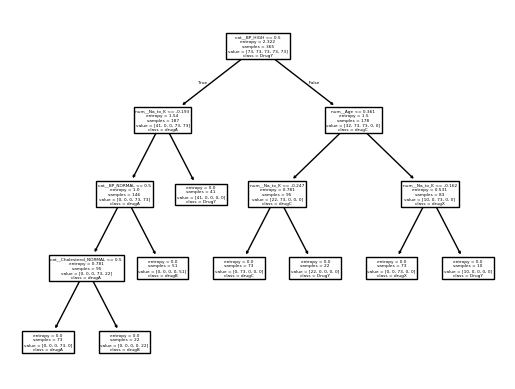

Test
              precision    recall  f1-score   support

       DrugY       0.95      1.00      0.97        18
       drugA       1.00      1.00      1.00         5
       drugB       1.00      1.00      1.00         3
       drugC       1.00      1.00      1.00         3
       drugX       1.00      0.91      0.95        11

    accuracy                           0.97        40
   macro avg       0.99      0.98      0.99        40
weighted avg       0.98      0.97      0.97        40



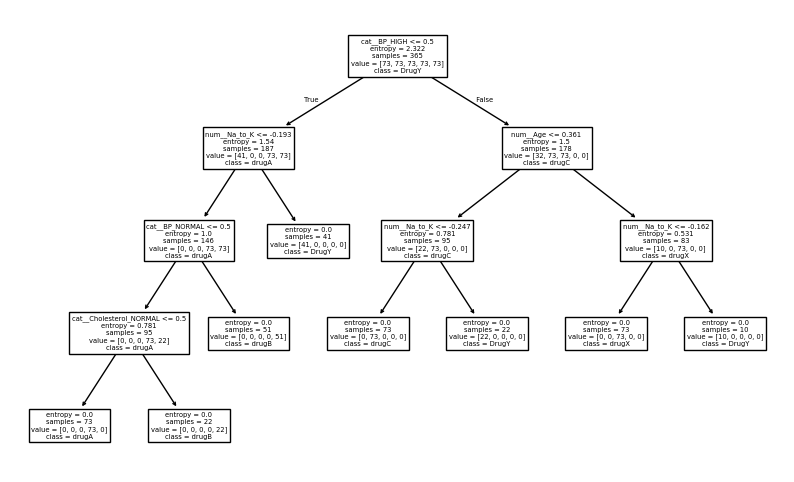

In [118]:
tree(X_train_smotenc, y_train_smotenc, X_test, y_test, 'entropy',feature_names , y.unique().tolist())

#### Алгоритм C4.5.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Train
              precision    recall  f1-score   support

       DrugY       1.00      1.00      1.00        73
       drugA       1.00      1.00      1.00        73
       drugB       1.00      1.00      1.00        73
       drugC       1.00      1.00      1.00        73
       drugX       1.00      1.00      1.00        73

    accuracy                           1.00       365
   macro avg       1.00      1.00      1.00       365
weighted avg       1.00      1.00      1.00       365



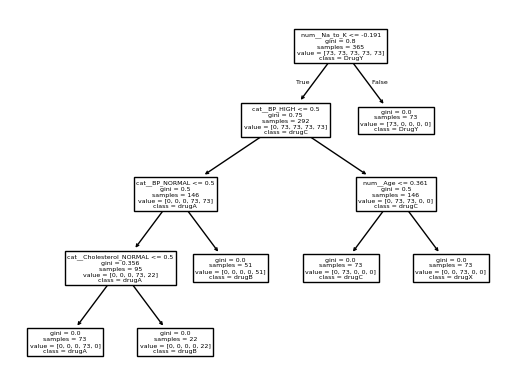

Test
              precision    recall  f1-score   support

       DrugY       0.95      1.00      0.97        18
       drugA       1.00      1.00      1.00         5
       drugB       1.00      1.00      1.00         3
       drugC       1.00      1.00      1.00         3
       drugX       1.00      0.91      0.95        11

    accuracy                           0.97        40
   macro avg       0.99      0.98      0.99        40
weighted avg       0.98      0.97      0.97        40



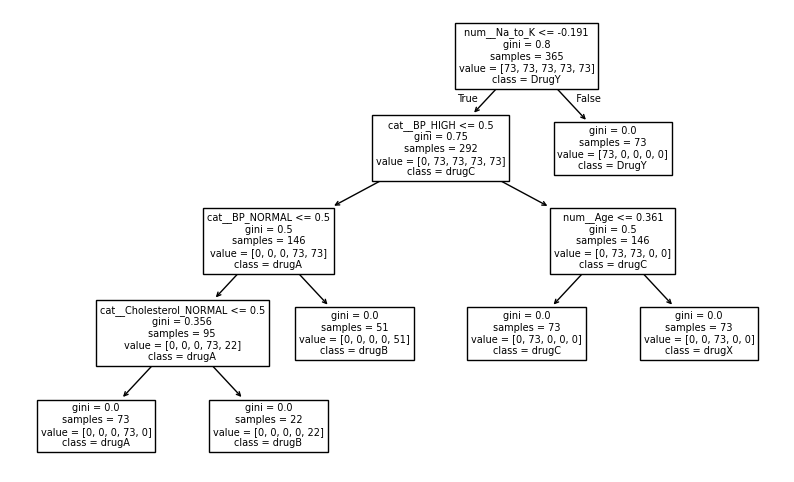

In [121]:
tree(X_train_smotenc, y_train_smotenc, X_test, y_test, 'gini',feature_names , y.unique().tolist())

Висновок: дерева перенавчаються. Потрібно налаштувати пареметри дерев

## Фіксимо перенавчання

#### Алгоритм C4.5.

In [125]:
def tree_new (X_train, y_train, X_test, y_test, criterion, feature_names, class_names):
      clf = DecisionTreeClassifier(criterion=criterion, max_depth=3)
      clf.fit(X_train, y_train)
      train_pred = clf.predict(X_train)
      test_pred = clf.predict(X_test)
      print("Train")
      print(classification_report(y_train, train_pred))
      plot_tree(clf, feature_names=feature_names, class_names=class_names)
      plt.show()
      print("Test")
      print(classification_report(y_test, test_pred))
      plt.figure(figsize=(10, 6))
      plot_tree(clf, feature_names=feature_names, class_names=class_names)
      plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Train
              precision    recall  f1-score   support

       DrugY       1.00      1.00      1.00        73
       drugA       1.00      1.00      1.00        73
       drugB       1.00      1.00      1.00        73
       drugC       0.77      1.00      0.87        73
       drugX       1.00      0.70      0.82        73

    accuracy                           0.94       365
   macro avg       0.95      0.94      0.94       365
weighted avg       0.95      0.94      0.94       365



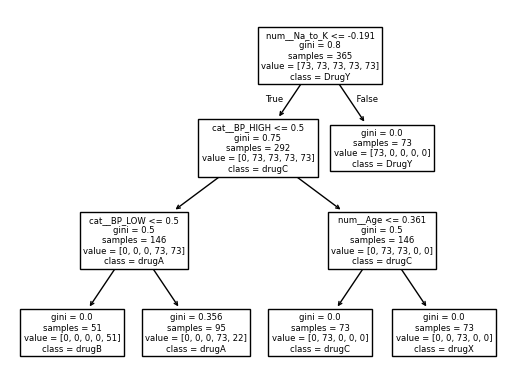

Test
              precision    recall  f1-score   support

       DrugY       0.95      1.00      0.97        18
       drugA       1.00      1.00      1.00         5
       drugB       1.00      1.00      1.00         3
       drugC       0.50      1.00      0.67         3
       drugX       1.00      0.64      0.78        11

    accuracy                           0.90        40
   macro avg       0.89      0.93      0.88        40
weighted avg       0.94      0.90      0.90        40



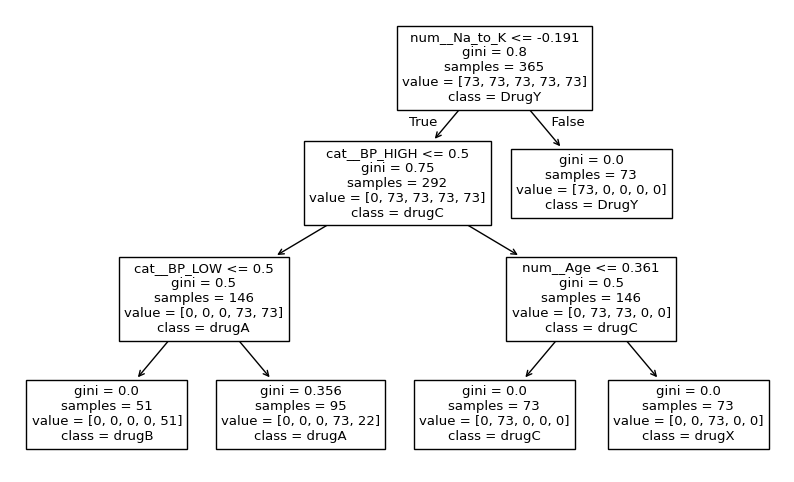

In [123]:
tree_new(X_train_smotenc, y_train_smotenc, X_test, y_test, 'gini',feature_names , y.unique().tolist())

#### Алгоритм ID3

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Train
              precision    recall  f1-score   support

       DrugY       1.00      1.00      1.00        73
       drugA       1.00      1.00      1.00        73
       drugB       1.00      1.00      1.00        73
       drugC       0.77      1.00      0.87        73
       drugX       1.00      0.70      0.82        73

    accuracy                           0.94       365
   macro avg       0.95      0.94      0.94       365
weighted avg       0.95      0.94      0.94       365



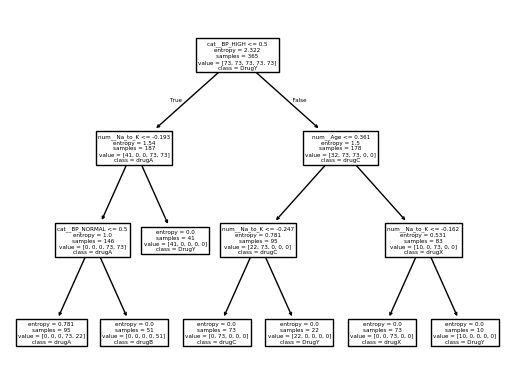

Test
              precision    recall  f1-score   support

       DrugY       0.95      1.00      0.97        18
       drugA       1.00      1.00      1.00         5
       drugB       1.00      1.00      1.00         3
       drugC       0.50      1.00      0.67         3
       drugX       1.00      0.64      0.78        11

    accuracy                           0.90        40
   macro avg       0.89      0.93      0.88        40
weighted avg       0.94      0.90      0.90        40



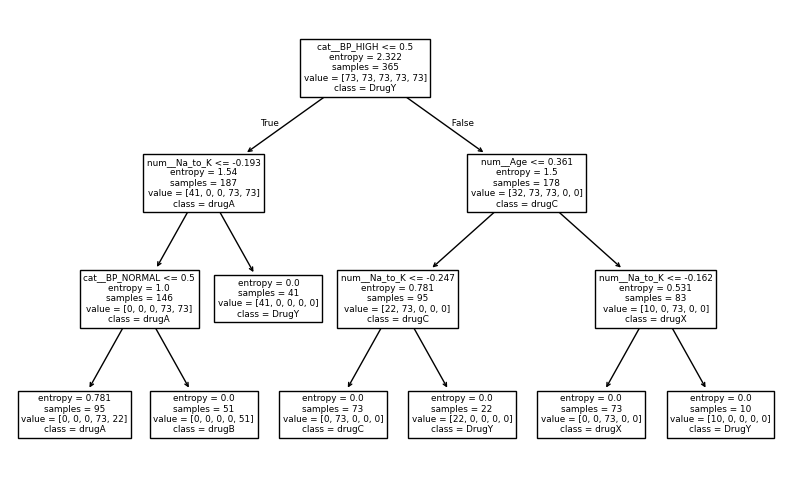

In [126]:
tree_new(X_train_smotenc, y_train_smotenc, X_test, y_test, 'entropy',feature_names , y.unique().tolist())

Висновок: обрізання дерева дали хороші результати в боротьбі з перенавчанням. Обидва алгоритми добре генералізуються на тестових даних, але Алгоритм ID3 має кращий f1-score на тренувальних. Тому як фінальну модель, я б обрала Алгоритм ID3